<a href="https://colab.research.google.com/github/JianfengMI/MLprojects/blob/main/RL_Q_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This will show, at each tile in our grid, what the best action is to take. A higher Q-Value for an action in a given state action pair represents the optimal learned action.
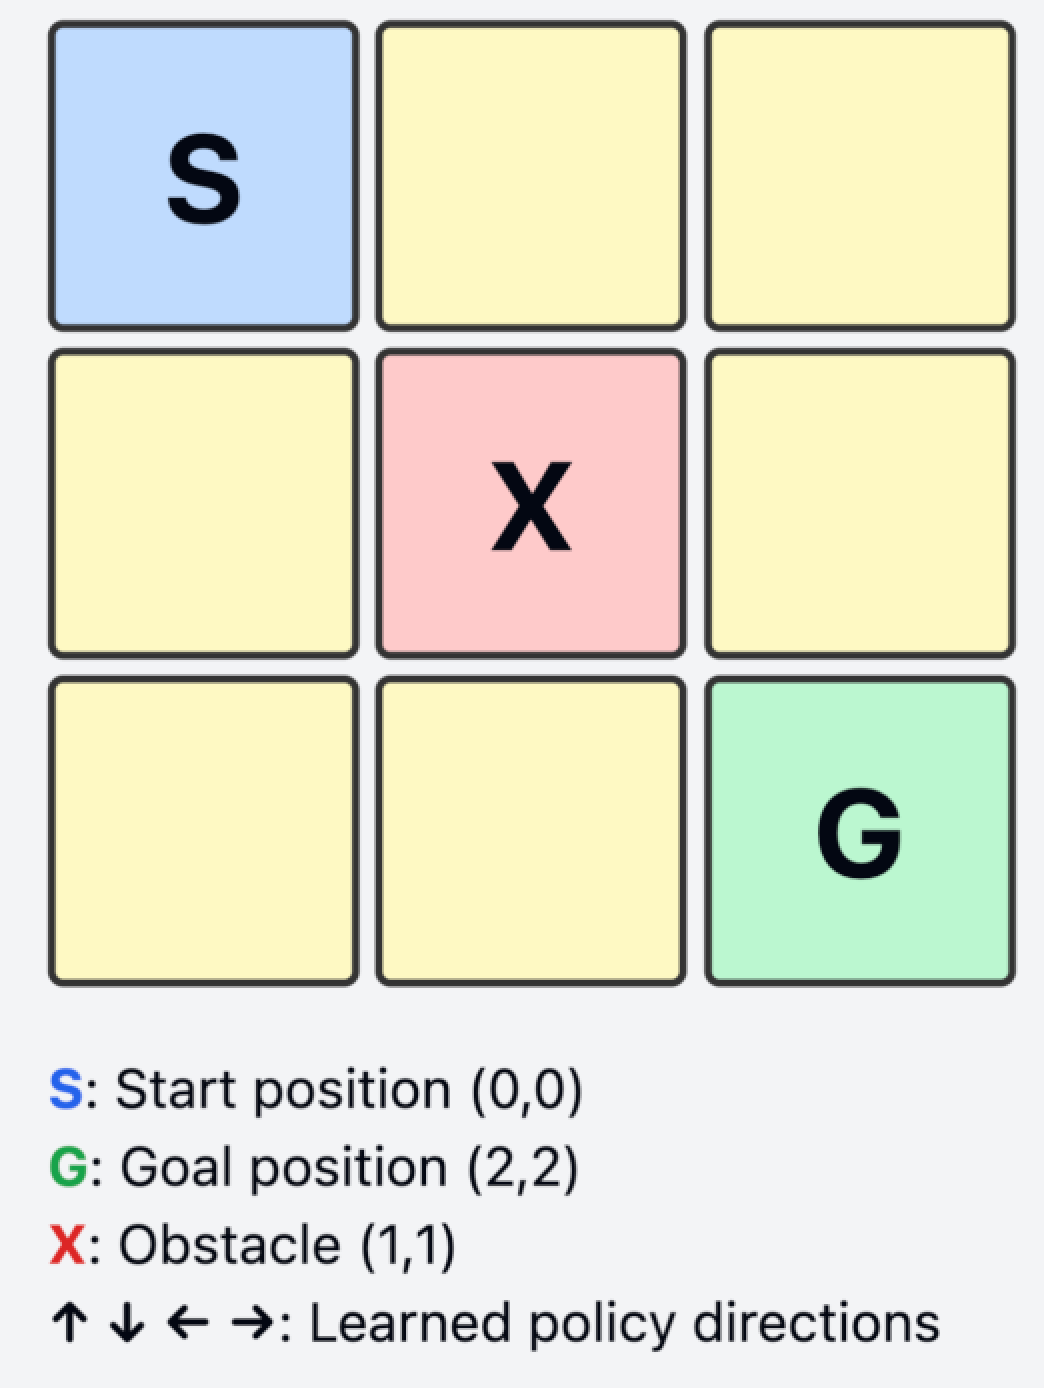

In [ ]:
# set up the Environment and Actions
import numpy as np
import random
from typing import Tuple, List

# define the grid world
GRID_SIZE = 3
START = (0,0)
GOAL = (2,2)
OBSTACLE = (1,1)

# define the actions
ACTIONS = [(-1,0), # up
           (0,1), # right
           (1,0), # down
           (0,-1) # left
           ]

In [ ]:
# ensures state is within grid boundaries, using is_valid_state function
def is_valid_state(state: Tuple[int, int]) -> bool:
    return (0 <= state[0] < GRID_SIZE and
            0 <= state[1] < GRID_SIZE and
            state != OBSTACLE)

In [ ]:
# get_next_state adds the action taken to the current state and check if it's a valid
def get_next_state(state: Tuple[int, int], action: Tuple[int, int]) -> Tuple[int, int]:
    next_state = (state[0] + action[0], state[1] + action[1])
    return next_state if is_valid_state(next_state) else state

In [ ]:
# Define Q-Learning parameters
EPSILON = 0.3
ALPHA = 0.3
GAMMA = 0.99
EPISODES = 10000



    EPSILON (ε) = 0.3
        This is the exploration rate.
        It determines the probability of the agent choosing a random action instead of the best known action.
        With EPSILON = 0.3, the agent will explore (choose a random action) 30% of the time and exploit (choose the best known action) 70% of the time.
        This balance helps the agent discover new potentially better paths while also utilizing what it has learned.

    ALPHA (α) = 0.3
        This is the learning rate.
        It determines how much the agent values new information compared to existing information.
        With ALPHA = 0.3, the agent will incorporate 30% of the new information and retain 70% of the old information when updating Q-values.
        A higher value makes the agent adapt more quickly to new information, while a lower value makes it more conservative.

    GAMMA (γ) = 0.99
        This is the discount factor.
        It determines how much the agent values future rewards compared to immediate rewards.
        With GAMMA = 0.99, future rewards are valued at 99% of their actual value.
        A value close to 1 (like 0.99) means the agent cares almost as much about long-term rewards as short-term rewards.
        This encourages the agent to consider long-term consequences of its actions.

    EPISODES = 10000
        This is the number of training episodes.
        Each episode represents one complete run through the environment, from the start state to a terminal state (either reaching the goal or a maximum number of steps).
        10,000 episodes give the agent many opportunities to explore the environment and learn the optimal policy.

EPSILON ensures a balance between exploration and exploitation.
ALPHA controls how quickly the agent adapts to new information.
GAMMA encourages the agent to consider long-term rewards.
EPISODES determines how many chances the agent gets to learn.
EPSILON ensures a balance between exploration and exploitation.
ALPHA controls how quickly the agent adapts to new information.
GAMMA encourages the agent to consider long-term rewards.
EPISODES determines how many chances the agent gets to learn.

Creating Agent Rewards

In RL, rewards are scalar feedback signals that indicate how well the agent is doing at a given time step. It's essentially the agent's way of understanding whether its actions are good or bad in terms of achieving its goal. Generally, reinforcement learning algorithms attempt to learn to maximize the reward gained.

Our primary objective here is to reach the goal tile, so we want to setup some reward that rewards doing that, and penalizes making incorrect moves like hitting walls or obstacles. As a secondary objective, we also want to find the most efficient path.

In get_reward we return a positive reward of 100 if we have reached the goal, and a penalty (negative reward) of -10 for hitting a wall or obstacle for our primary objective. To ensure an efficient path, we have a small penalty for each step taken.

The specific values (100, -10, -1) are somewhat arbitrary and can be adjusted. What's important to focus on here is the relative differences between these values. Reaching the goal should be much more rewarding than the penalty for a single step, and hitting an obstacle should be more punishing than taking an extra step.


In [ ]:
# def get_reward(state: Tuple[int, int], action: Tuple[int, int]) -> int:
#     if next_state == GOAL:
#         return 100
#     elif next_state == OBSTACLE or next_state == state: # Penalize hitting walls or obstacle
#         return -10
#     else:
#         return -1.0 # small penalty for each step to encourage shortest path

def get_reward(state: Tuple[int, int], action: Tuple[int, int]) -> int:
    # Calculate the potential next state based on the current state and action
    potential_next_state = (state[0] + action[0], state[1] + action[1])

    if potential_next_state == GOAL:
        return 100
    elif potential_next_state == OBSTACLE or potential_next_state == state: # Penalize hitting walls or obstacle
        return -10
    else:
        return -1 # Small penalty for each step to encourage reaching the goal faster

In [ ]:
# choose an action - exploration vs. exploitation
def choose_action(state: Tuple[int, int], q_table:np.ndarray) -> Tuple[int, int]:
    if random.uniform(0,1) < EPSILON:
        return random.choice(ACTIONS)
    else:
        return ACTIONS[np.argmax(q_table[state])]

In [ ]:
# update Q-value learning and the Bellman Equation

The Q-Values themselves that constitute which action in a state-action pair is the best to take are determined based on multiple factors, calculated using the Bellman Equation:
<math xmlns="http://www.w3.org/1998/Math/MathML" display="block">
  <mi>Q</mi>
  <mo stretchy="false">(</mo>
  <mi>s</mi>
  <mo>,</mo>
  <mi>a</mi>
  <mo stretchy="false">)</mo>
  <mo stretchy="false">&#x2190;</mo>
  <mi>Q</mi>
  <mo stretchy="false">(</mo>
  <mi>s</mi>
  <mo>,</mo>
  <mi>a</mi>
  <mo stretchy="false">)</mo>
  <mo>+</mo>
  <mi>&#x3B1;</mi>
  <mrow data-mjx-texclass="INNER">
    <mo data-mjx-texclass="OPEN">[</mo>
    <mi>r</mi>
    <mo>+</mo>
    <mi>&#x3B3;</mi>
    <munder>
      <mo data-mjx-texclass="OP" movablelimits="true">max</mo>
      <mrow data-mjx-texclass="ORD">
        <msup>
          <mi>a</mi>
          <mo data-mjx-alternate="1">&#x2032;</mo>
        </msup>
      </mrow>
    </munder>
    <mi>Q</mi>
    <mo stretchy="false">(</mo>
    <msup>
      <mi>s</mi>
      <mo data-mjx-alternate="1">&#x2032;</mo>
    </msup>
    <mo>,</mo>
    <msup>
      <mi>a</mi>
      <mo data-mjx-alternate="1">&#x2032;</mo>
    </msup>
    <mo stretchy="false">)</mo>
    <mo>&#x2212;</mo>
    <mi>Q</mi>
    <mo stretchy="false">(</mo>
    <mi>s</mi>
    <mo>,</mo>
    <mi>a</mi>
    <mo stretchy="false">)</mo>
    <mo data-mjx-texclass="CLOSE">]</mo>
  </mrow>
</math>

Where:

    Q(s, a) q_table[state][action_idx]: The Q-value for taking action (a) in state (s).
    α ALPHA: Learning rate, controlling how much the new information overrides the old.
    (r) reward: Reward received after taking action (a).
    γ GAMMA: Discount factor, determining the importance of future rewards.
    (s') next_state: The next state after taking action (a).
    maxQ(s', a')) np.max(q_table[next_state]): Maximum expected future reward for the next state (s').


In [ ]:
def update_q_table(q_table: np.ndarray, state: Tuple[int, int], action: Tuple[int, int], next_state: Tuple[int, int], reward: int) -> None:
  action_idx = ACTIONS.index(action)
  q_table[state][action_idx] += ALPHA * (reward + GAMMA * np.max(q_table[next_state]) - q_table[state][action_idx])



Gamma as the discount factor:

    If GAMMA = 1: Future rewards would be valued equally to immediate rewards. The agent would care just as much about rewards far in the future as it does about immediate rewards.
    If GAMMA = 0: The agent would only care about immediate rewards and ignore future rewards completely.
    With GAMMA = 0.99: Future rewards are valued at 99% of their actual value. This means the agent cares a lot about future rewards, but slightly less than immediate rewards.

ALPHA as the learning rate:

    If ALPHA = 1: The old Q-value would be completely replaced by the new estimate. This would result in very rapid learning, but also high volatility and potential instability.
    If ALPHA = 0: The Q-value would never update, and no learning would occur.
    With ALPHA = 0.3: The Q-value is updated by moving 30% of the way toward the new estimate.
        If the new estimate is higher than the old Q-value, the Q-value will increase, but only by 30% of the difference.
        If the new estimate is lower than the old Q-value, the Q-value will decrease, but only by 30% of the difference.



In [ ]:
# Training script
"""
The main agent training script returns the learned Q-Table by following these steps:

    Create an empty (zeroed) table the same size as the environment, 3x3 in our example case
    Start the current state at the starting point, (0, 0)
    Choose an action to take based on the current state and the Q-Table
    Determine the next state based on the action chosen and the current state
    Calculate the reward based on the action taken
    Update the Q-Table for the current state-action pair based on the reward and the next state
    Move to the next state for the next iteration of the loop and repeat until the goal is reached
    Repeat this process for how many episodes chosen, 10,000

Finally, the Q-Table is returned which will outline the best moves to make for the given objective!
"""
def train_agent() -> np.ndarray:
  q_table = np.zeros((GRID_SIZE, GRID_SIZE, len(ACTIONS)))

  for _ in range(EPISODES):
    state = START
    while state != GOAL:
      action = choose_action(state, q_table)
      next_state = get_next_state(state, action)
      reward = get_reward(state, next_state)
      update_q_table(q_table, state, action, next_state, reward)
      state = next_state

  return q_table

In [ ]:
# train the agent
q_table = train_agent()

In [ ]:
def visualize_q_table_as_grid(q_table: np.ndarray) -> None:
    """Visualize the Q-table as a grid with all action values for each state."""
    action_symbols = ['^', '>', 'v', '<']

    print("\nDetailed Q-table Grid:")

    # Header
    header = "   |" + "|".join(f"   ({i},{j})   " for i in range(GRID_SIZE) for j in range(GRID_SIZE)) + "|"
    print(header)
    print("-" * len(header))

    for action_idx, action_symbol in enumerate(action_symbols):
        row = f" {action_symbol} |"
        for i in range(GRID_SIZE):
            for j in range(GRID_SIZE):
                if (i, j) == GOAL:
                    cell = "   GOAL    "
                elif (i, j) == OBSTACLE:
                    cell = " OBSTACLE  "
                else:
                    q_value = q_table[i, j, action_idx]
                    cell = f" {q_value:9.2f} "
                row += cell + "|"
        print(row)
        print("-" * len(header))

def visualize_best_actions_grid(q_table: np.ndarray) -> None:
    """Visualize the best action and its Q-value for each state in a grid."""
    action_symbols = ['^', '>', 'v', '<']

    print("\nBest Actions Grid:")
    header = "-" * (14 * GRID_SIZE + 1)
    print(header)

    for i in range(GRID_SIZE):
        row = "| "
        for j in range(GRID_SIZE):
            if (i, j) == GOAL:
                cell = "   GOAL    "
            elif (i, j) == OBSTACLE:
                cell = " OBSTACLE  "
            else:
                best_action_idx = np.argmax(q_table[i, j])
                best_q_value = q_table[i, j, best_action_idx]
                cell = f"{action_symbols[best_action_idx]}:{best_q_value:7.2f}  "
            row += cell + " | "
        print(row)
        print(header)

In [ ]:
# Visualize the Q-table as a grid
visualize_q_table_as_grid(q_table)

# Visualize the best actions and their Q-values in a grid
visualize_best_actions_grid(q_table)